In [6]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [7]:
%tensorflow_version 2.1

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [12]:
# Print versions
!python --version
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

Python 3.9.16
Numpy 1.22.4
TensorFlow 2.12.0
Keras 2.12.0


In [13]:
# Settings
nsamples = 1000                  # Number of samples to use as a dataset
val_ratio = 0.2                  # Percentage of samples that should be held for validation set
test_ratio = 0.2                 # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model' # Will be given .tflite suffix
c_model_name  = 'sine_model'     # Will be given .h suffix

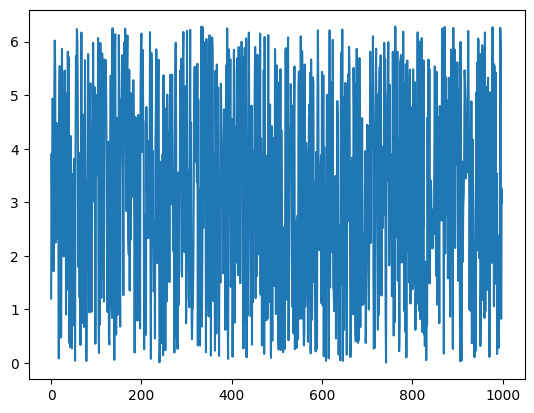

In [14]:
# Generate some random samples
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

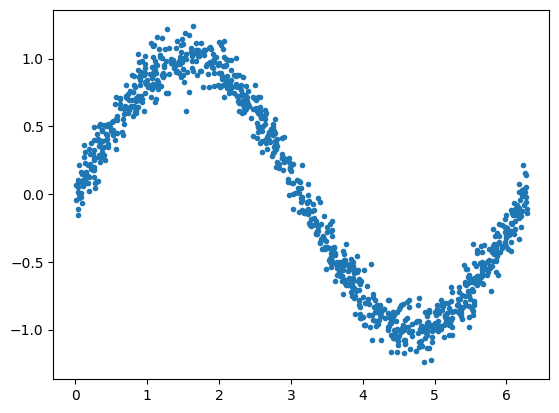

In [15]:
# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

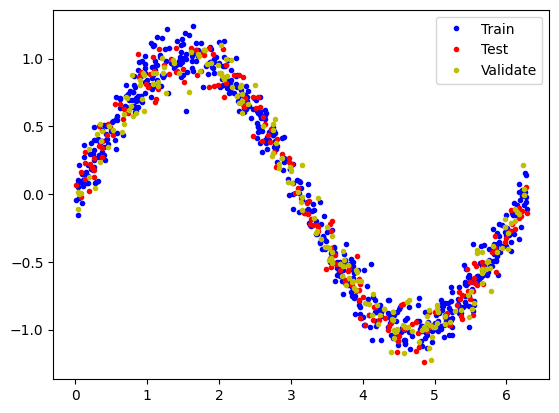

In [16]:
# Split the dataset into training, validatio, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors
plt.plot(x_train, y_train, 'b.', label='Train')
plt.plot(x_test, y_test, 'r.', label='Test')
plt.plot(x_val, y_val, 'y.', label='Validate')
plt.legend()
plt.show()

In [18]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [19]:
# View model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [21]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/500
6/6 [==============================] - 1s 41ms/step - loss: 0.8242 - mae: 0.8242 - val_loss: 0.7610 - val_mae: 0.7610
Epoch 2/500
6/6 [==============================] - 0s 7ms/step - loss: 0.7187 - mae: 0.7187 - val_loss: 0.6807 - val_mae: 0.6807
Epoch 3/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6569 - mae: 0.6569 - val_loss: 0.6177 - val_mae: 0.6177
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6100 - mae: 0.6100 - val_loss: 0.5718 - val_mae: 0.5718
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5769 - mae: 0.5769 - val_loss: 0.5442 - val_mae: 0.5442
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5559 - mae: 0.5559 - val_loss: 0.5279 - val_mae: 0.5279
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5421 - mae: 0.5421 - val_loss: 0.5113 - val_mae: 0.5113
Epoch 8/500
6/6 [==============================] - 0s 7ms/step - loss: 0.5270 - mae: 0.5270 - v

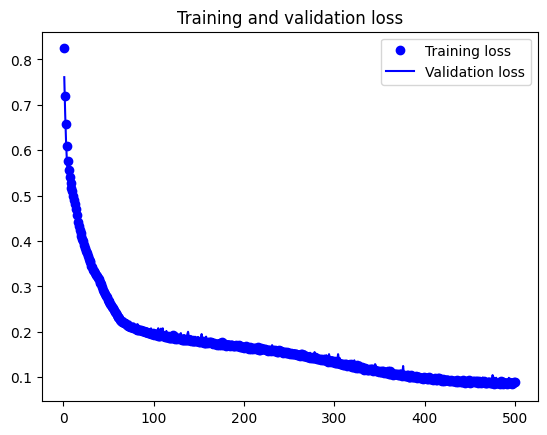

In [23]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 1ms/step


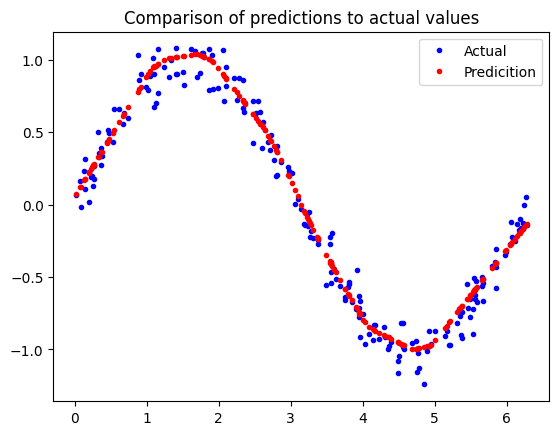

In [24]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title('Comparison of predictions to actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicition')
plt.legend()
plt.show()

In [31]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

3168

In [74]:
# Alternative (Linux): xxd -i sine_model.tflite > sine_model.cc

# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = [' ']
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ', '
    if (i + 1) % 12 == 0 and not (i + 1) == len(hex_data):
      hex_str += '\n  '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(''.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [75]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))